In [25]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [26]:
# Printing version of the TensorFlow
print(tf.__version__)

2.11.1


In [27]:
# Loading the dataset

mnist=keras.datasets.mnist # Loading the dataset

(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

# see the size of the dataset
# print("Train Images Shape: %s \nTrain Labels: %s \nTest Images Shape: %s \nTest Labels: %s"  % (xtrain.shape, xtrain,xtest.shape,ytest))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [28]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']


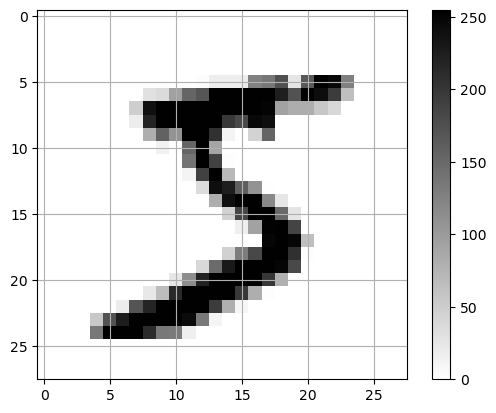

Class ID: 5 and Class name: Five


In [29]:
# inspect the data in the array

index=0 # change this number 
plt.imshow(xtrain[index], cmap=plt.cm.binary) # printing 10th image. You may use cmap='gray'
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

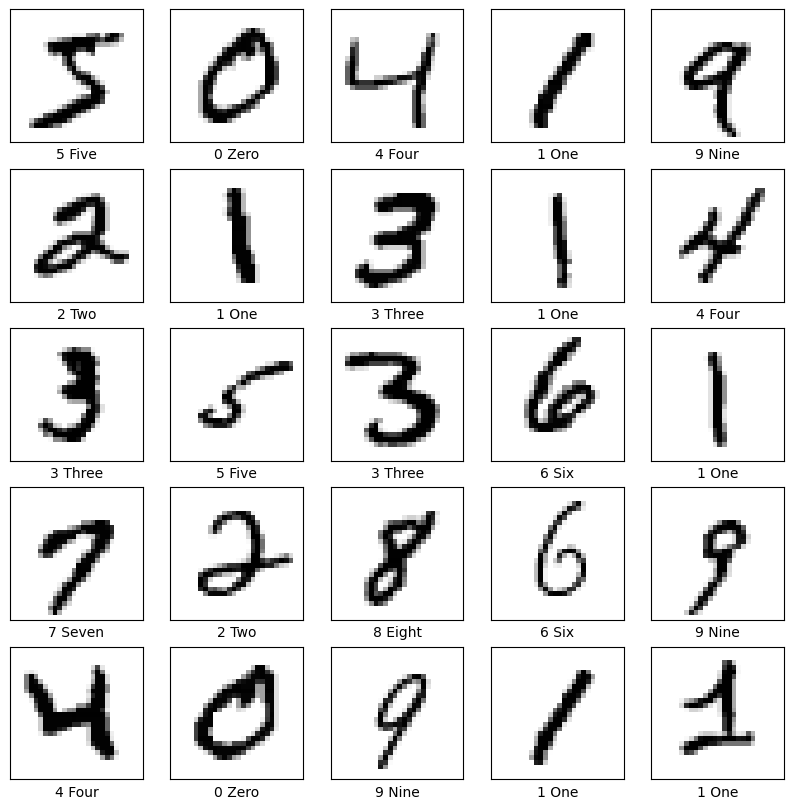

In [30]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

In [31]:
# Pixel value of the image falls between 0 to 255.

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)
xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (60000,) and value: [5 0 4 ... 5 6 8]
ytest Shape: (10000,) and value: [7 2 1 ... 4 5 6]
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


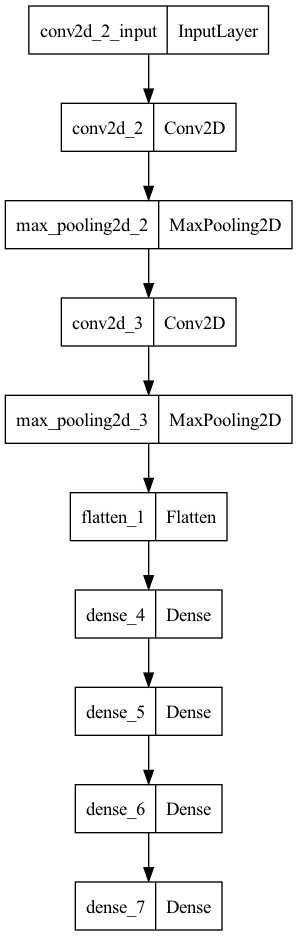

In [33]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()
#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(10,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(28,28))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(100, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(80, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# Ploting the Model
plot_model(model)

In [34]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 10)        550       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [35]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(60000,28,28,1)
xtest2=xtest.reshape(10000,28,28,1)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=100,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/100
60/60 [==============================] - 6s 88ms/step - loss: 1.1441 - accuracy: 0.6576 - val_loss: 0.3731 - val_accuracy: 0.8879
Epoch 2/100
60/60 [==============================] - 5s 78ms/step - loss: 0.2951 - accuracy: 0.9109 - val_loss: 0.2127 - val_accuracy: 0.9355
Epoch 3/100
60/60 [==============================] - 5s 78ms/step - loss: 0.1909 - accuracy: 0.9420 - val_loss: 0.1450 - val_accuracy: 0.9564
Epoch 4/100
60/60 [==============================] - 5s 78ms/step - loss: 0.1412 - accuracy: 0.9575 - val_loss: 0.1175 - val_accuracy: 0.9641
Epoch 5/100
60/60 [==============================] - 5s 79ms/step - loss: 0.1122 - accuracy: 0.9660 - val_loss: 0.0934 - val_accuracy: 0.9713
Epoch 6/100
60/60 [==============================] - 5s 79ms/step - loss: 0.0962 - accuracy: 0.9705 - val_loss: 0.0814 - val_accuracy: 0.9741
Epoch 7/100
60/60 [==============================] - 5s 80ms/step - loss: 0.0821 - accuracy: 0.9744 - val_loss: 0.0747 - val_accuracy: 0.9758
Epoch 

In [36]:
# evaluate accuracy of the model

test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9896
accuracy: 0.9896000027656555


In [37]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 1s 2ms/step
1. Prediction array: [1.91039617e-18 6.66286794e-21 3.43568938e-17 1.19028447e-19
 2.53972644e-15 2.87573482e-16 6.51296185e-23 1.00000000e+00
 9.81734205e-20 1.37249925e-11]
2. Label number having highest confidence in prediction array: 7
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [38]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

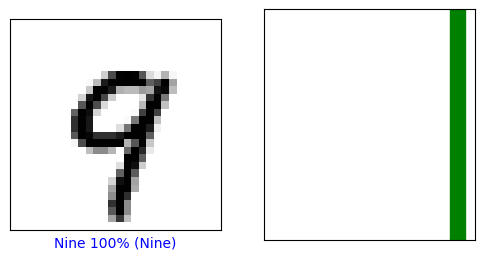

In [39]:
# call the function

# defining parameters to pass to function
i=12 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

In [40]:
model.save("cnn_model.h5")